In [1]:
import cv2
import os 
import numpy as np
from tqdm import tqdm
from PIL import Image,ImageEnhance
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def DetectLine(cnt, th=5):
    x,y,w,h = cv2.boundingRect(cnt)
    center_x = int(x+w/2)
    center_y = int(y+h/2)
    # find top
    s_p = []
    for point in cnt:
        if point[0,1] < center_y:
            s_p.append(point[0,1])
    unique, counts = np.unique(s_p, return_counts=True)
    values = []
    for v,c in zip(unique,counts):
        if c>100:
            values.append(v)
    if len(values) and max(values)-min(values)<th:
        top = int(np.mean(values))
    else:
        top = y
    # find bottom
    s_p = []
    for point in cnt:
        if point[0,1] > center_y:
            s_p.append(point[0,1])
    unique, counts = np.unique(s_p, return_counts=True)
    values = []
    for v,c in zip(unique,counts):
        if c>100:
            values.append(v)
    if len(values) and max(values)-min(values)<th:
        bottom = int(np.mean(values))
    else:
        bottom = y+h
    # find left
    s_p = []
    for point in cnt:
        if point[0,0] < center_x:
            s_p.append(point[0,0])
    unique, counts = np.unique(s_p, return_counts=True)
    values = []
    for v,c in zip(unique,counts):
        if c>100:
            values.append(v)
    if len(values) and max(values)-min(values)<th:
        left = int(np.mean(values))
    else:
        left = x
    # find right
    s_p = []
    for point in cnt:
        if point[0,0] > center_x:
            s_p.append(point[0,0])
    unique, counts = np.unique(s_p, return_counts=True)
    values = []
    for v,c in zip(unique,counts):
        if c>100:
            values.append(v)
    if len(values) and max(values)-min(values)<th:
        right = int(np.mean(values))
    else:
        right = x+w
    return left,top,right,bottom

def roi_extraction(img, th=30, min_size=50000,detect_line=True):
    """
        args:
            src: img path
            min_size: min size of roi
    """
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,th,255,0)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    save_cnts = {}
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_size:
            save_cnts[area]=cnt
    key = max(save_cnts.keys())
    cnt = save_cnts[key]
    if detect_line:
        left,top,right,bottom = DetectLine(cnt,th=5)
        return left,top,right,bottom,cnt
    else:
        x,y,w,h = cv2.boundingRect(cnt)
        return x,y,x+w,y+h,cnt

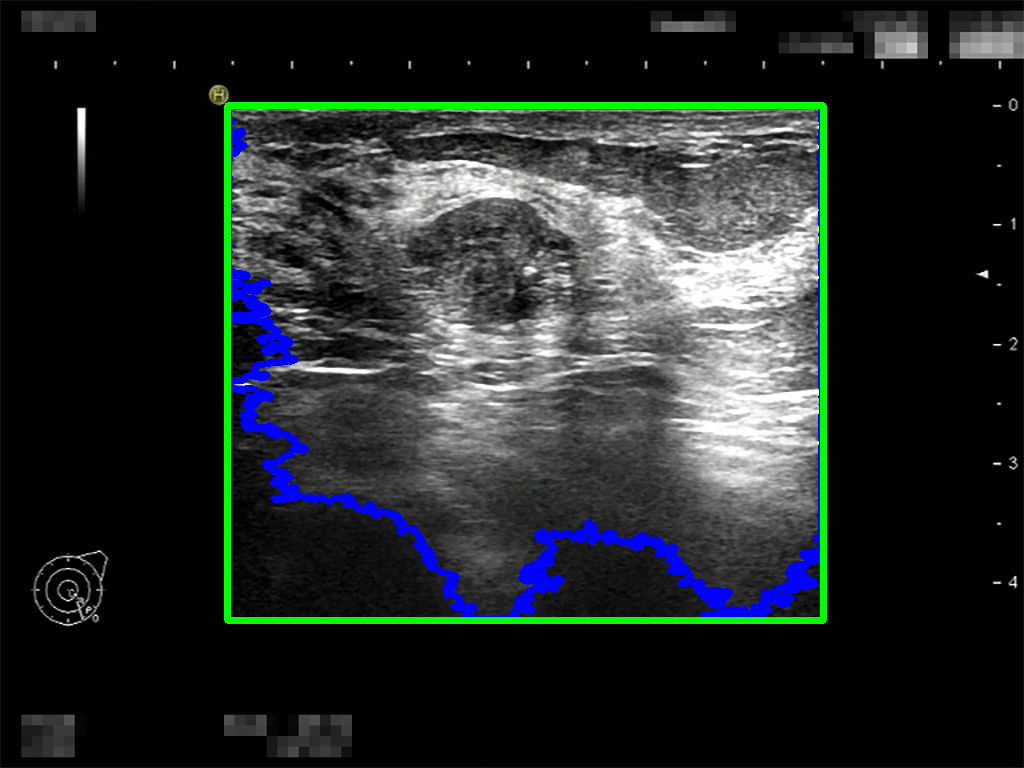

In [3]:
img_path = "sample_1.jpg"
img = cv2.imread(img_path)
left,top,right,bottom,cnt = roi_extraction(img,th=30,detect_line=False)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
roi = img[top:bottom, left:right]
Image.fromarray(roi).save("sample_1_roi.jpg")
img = cv2.drawContours(img, [cnt], -1, (0,0,255), 5)
img = cv2.rectangle(img,(left,top),(right,bottom),(0,255,0),5)
Image.fromarray(img)

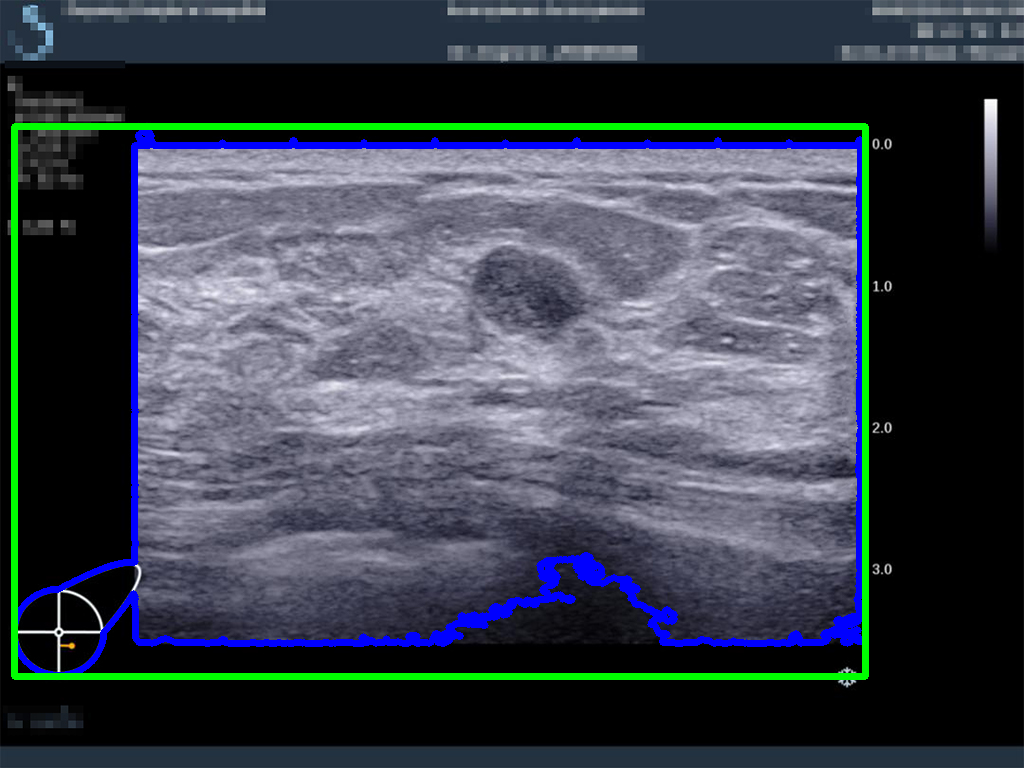

In [4]:
img_path = "sample_2.jpg"
img = cv2.imread(img_path)
left,top,right,bottom,cnt = roi_extraction(img,th=30,detect_line=False)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
roi = img[top:bottom, left:right]
Image.fromarray(roi).save("sample_2_roi_without_linedetection.jpg")
img = cv2.drawContours(img, [cnt], -1, (0,0,255), 5)
img = cv2.rectangle(img,(left,top),(right,bottom),(0,255,0),5)
Image.fromarray(img)

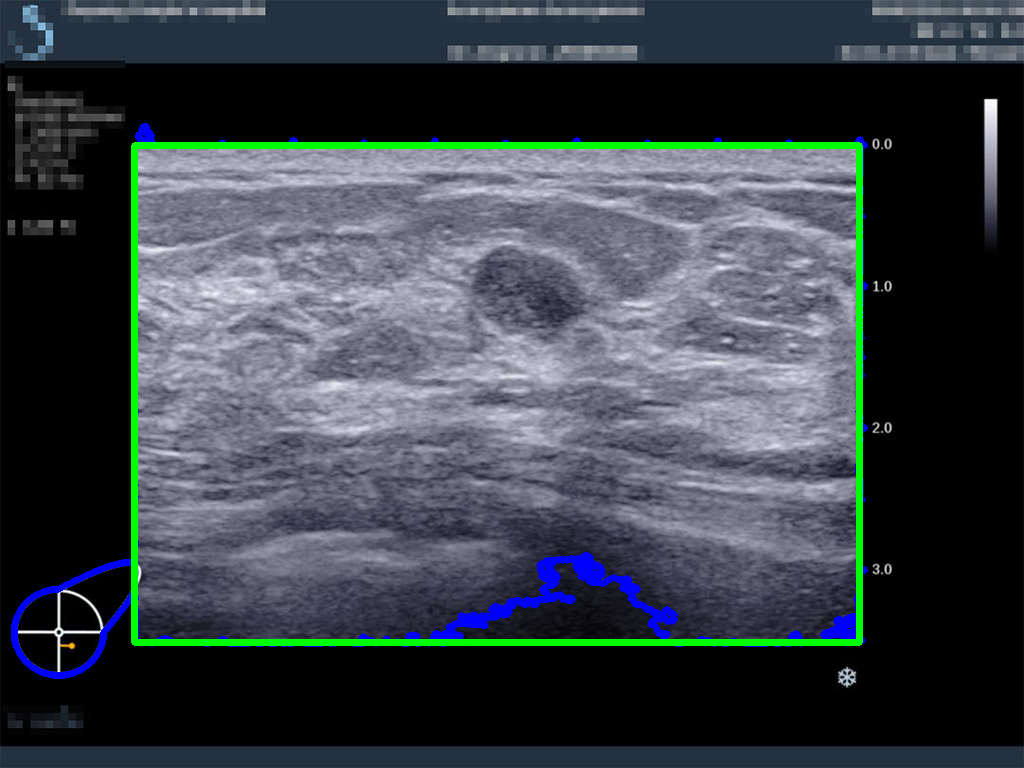

In [5]:
img_path = "sample_2.jpg"
img = cv2.imread(img_path)
left,top,right,bottom,cnt = roi_extraction(img,th=30,detect_line=True)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
roi = img[top:bottom, left:right]
Image.fromarray(roi).save("sample_2_roi_with_linedetection.jpg")
img = cv2.drawContours(img, [cnt], -1, (0,0,255), 5)
img = cv2.rectangle(img,(left,top),(right,bottom),(0,255,0),5)
Image.fromarray(img)